In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

# Open data files

## PCA

In [2]:
pca_df = pd.read_csv('session_data_v2_dimReduced_pca.csv')
pca_df['binary_labels'] = pca_df.conv_rate.apply(lambda x: -1 if x < 1 else 1)
pca_df.head()

,conv_rate,pc1,pc2,pc3,pc4,pc5,pc6,binary_labels
0,-0.262246,-10.944264,-2.470250,0.023180,-0.545362,0.813634,0.331955,-1
1,-0.262246,-10.944993,-2.495109,0.019695,0.857042,-0.572363,0.102365,-1
2,-0.262246,-10.948251,-2.689478,0.064897,-0.883097,0.231646,-0.465039,-1
3,-0.262246,-10.949970,-2.793037,0.084172,0.817486,0.815207,0.061924,-1
4,-0.262246,-10.949264,-2.739417,0.073640,-0.548368,0.814916,0.341104,-1


In [68]:
pca_df.shape

(1435733, 8)

## tSVD

In [3]:
svd_df = pd.read_csv('session_data_v2_dimReduced_tsvd.csv')
svd_df['binary_labels'] = svd_df.conv_rate.apply(lambda x: -1 if x < 1 else 1)
svd_df.head()

,conv_rate,sv1,sv2,sv3,sv4,sv5,sv6,binary_labels
0,-0.262246,23.053715,-2.585653,0.040374,-0.683031,-0.815175,0.643175,-1
1,-0.262246,23.068722,-2.607612,0.034357,-0.764778,0.678262,-0.644648,-1
2,-0.262246,23.057267,-2.804253,0.080387,-0.475019,-1.086974,0.042169,-1
3,-0.262246,23.054243,-2.908769,0.103166,-1.097773,0.483560,0.696880,-1
4,-0.262246,23.055073,-2.854825,0.090708,-0.677020,-0.816610,0.645025,-1


In [70]:
svd_df.shape

(1435733, 8)

## AutoEncoded

In [4]:
ae_df = pd.read_csv('session_data_v2_dimReduced_encoder.csv')
ae_df['binary_labels'] = ae_df.conv_rate.apply(lambda x: -1 if x < 1 else 1)
ae_df.head()

,conv_rate,X1,X2,X3,X4,X5,X6,binary_labels
0,-0.262246,0.0,8.757374,0.0,13.296490,11.232584,0.714490,-1
1,-0.262246,0.0,5.009790,0.0,14.405546,3.484223,1.160330,-1
2,-0.262246,0.0,10.031455,0.0,12.960207,9.013576,0.552835,-1
3,-0.262246,0.0,5.331458,0.0,13.109734,12.018019,0.537757,-1
4,-0.262246,0.0,8.857171,0.0,13.320195,11.315697,0.759686,-1


In [5]:
ae_df.shape

(1435733, 8)

# Data Exploration, once again

## ...via KMeans cluster exploration

In [39]:
def explore_kmeans_inertia(df, cluster_num_array):
    variances = []
    
    for cluster in cluster_num_array:
        kmeans = KMeans(n_clusters=cluster).fit(df)    
        
        var = kmeans.inertia_

        variances.append(var)    
        print("num_clusters: {}, inertia: {}".format(cluster, var))

    return variances
        
        # plot_inertia(variances, curr_clusters)


num_clusters: 5, inertia: 13481160.219715858
num_clusters: 6, inertia: 11907627.835909724
num_clusters: 7, inertia: 10794913.198805235
num_clusters: 8, inertia: 9808619.476898925
num_clusters: 9, inertia: 8895705.086357577
num_clusters: 10, inertia: 8271210.970089822
num_clusters: 11, inertia: 7732239.945240418
num_clusters: 12, inertia: 7433537.903810448
num_clusters: 13, inertia: 7130657.02753665
num_clusters: 14, inertia: 6837319.943118922
num_clusters: 15, inertia: 6622529.848106156
num_clusters: 16, inertia: 6248383.811485764
num_clusters: 17, inertia: 6046531.1950029
num_clusters: 18, inertia: 5818250.661372494
num_clusters: 19, inertia: 5695386.479962462


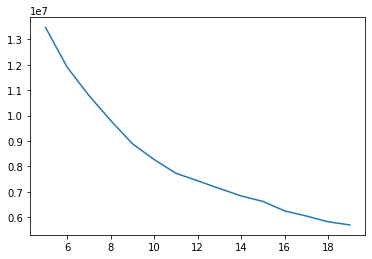

In [40]:
# pca kmeans clustering exploration
clusters = list(range(5,20))

variances = explore_kmeans_inertia(pca_df, clusters)

plt.plot(clusters, variances)

num_clusters: 5, inertia: 68664249.1639288
num_clusters: 6, inertia: 61545485.9619927
num_clusters: 7, inertia: 55208155.131803855
num_clusters: 8, inertia: 51071681.125641525
num_clusters: 9, inertia: 47579156.281968825
num_clusters: 10, inertia: 44866084.38077846
num_clusters: 11, inertia: 42732248.629569404
num_clusters: 12, inertia: 40881995.70004003
num_clusters: 13, inertia: 39247319.26842692
num_clusters: 14, inertia: 37692793.929386854
num_clusters: 15, inertia: 36536332.85917418
num_clusters: 16, inertia: 35513090.16449856
num_clusters: 17, inertia: 34566691.39047969
num_clusters: 18, inertia: 33476827.675882593
num_clusters: 19, inertia: 32635791.699838247


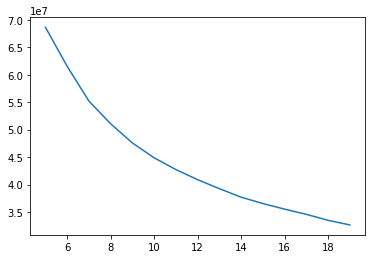

In [41]:
# encoded kmeans clustering exploration
clusters = list(range(5,20))

variances = explore_kmeans_inertia(ae_df, clusters)

plt.plot(clusters, variances)

## Closer look at the distribution of conv_rate

<AxesSubplot:xlabel='conv_rate', ylabel='Density'>

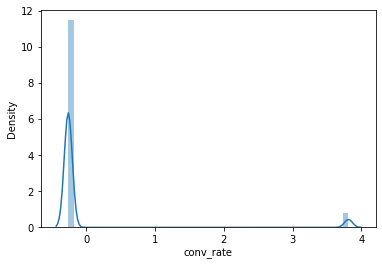

In [21]:
# looking at distribution of conv_rate
sbn.distplot(pca_df.conv_rate)

<AxesSubplot:xlabel='conv_rate', ylabel='Density'>

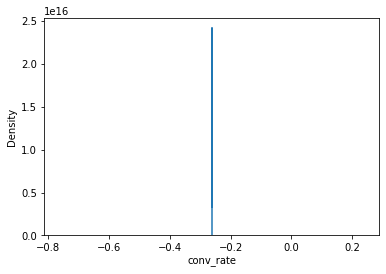

In [55]:
# looking at distribution of conv_rate < 2, makes sense, this is the 0 conv rates
subset_df = pca_df[pca_df['conv_rate'] < 2]
sbn.distplot(subset_df.conv_rate)

<AxesSubplot:xlabel='conv_rate', ylabel='Density'>

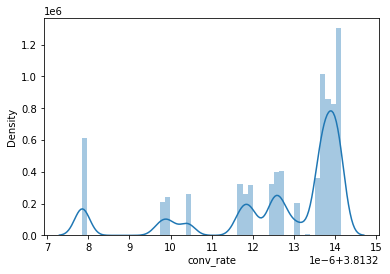

In [57]:
# looking at distribution of conv_rate
subset_df = pca_df[pca_df['conv_rate'] > 2]
sbn.distplot(subset_df.conv_rate.where(subset_df.conv_rate > 2))

## Large Class imbalance

<AxesSubplot:xlabel='binary_labels', ylabel='Count'>

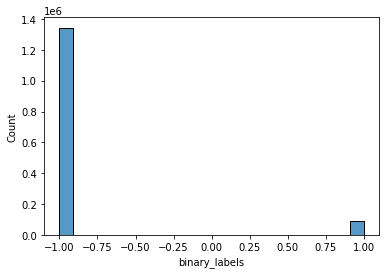

In [100]:
sbn.histplot(data=pca_df, x='binary_labels')

In [103]:
rus = RandomUnderSampler(random_state=42)
pca_X = pca_df.drop(columns=['conv_rate', 'binary_labels'])
pca_y = pca_df[['binary_labels']]
pca_X_res, pca_y_res = rus.fit_resample(pca_X, pca_y)

<AxesSubplot:xlabel='binary_labels', ylabel='Count'>

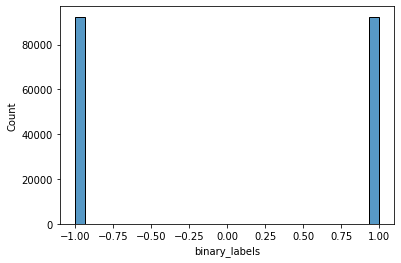

In [104]:
sbn.histplot(data=pca_y_res, x='binary_labels')

### Autoencoding resampling

In [121]:
rus = RandomUnderSampler(random_state=42)
ae_X = ae_df.drop(columns=['conv_rate', 'binary_labels'])
ae_y = ae_df[['binary_labels']]
ae_X_res, ae_y_res = rus.fit_resample(ae_X, ae_y)

# Modeling
## Here, intention is to try and predict whether a conversion happens or not

## Data Prep

In [105]:
# pca data prep
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X_res, pca_y_res, test_size=0.33, random_state=42)

In [122]:
# autoencoder data prep
ae_X_train, ae_X_test, ae_y_train, ae_y_test = train_test_split(ae_X_res, ae_y_res, test_size=0.33, random_state=42)

In [74]:
# trucatedSVD data prep
# svd_X_train, svd_X_test, svd_y_train, svd_y_test = train_test_split(svd_df.drop(columns=['conv_rate', 'binary_labels']), svd_df[['conv_rate']], test_size=0.33, random_state=42)

## Logistic Regression

### ...with PCA embeddings

In [113]:
logistic = LogisticRegression().fit(pca_X_train, pca_y_train)

In [117]:
pca_y_pred = logistic.predict(pca_X_test)
print(classification_report(pca_y_test, pca_y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.50      0.52     30378
           1       0.53      0.56      0.54     30597

    accuracy                           0.53     60975
   macro avg       0.53      0.53      0.53     60975
weighted avg       0.53      0.53      0.53     60975



### ...with Autoencoded embeddings

In [123]:
logistic = LogisticRegression().fit(ae_X_train, ae_y_train)

In [124]:
ae_y_pred = logistic.predict(ae_X_test)
print(classification_report(ae_y_test, ae_y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.80      0.85     30378
           1       0.82      0.92      0.87     30597

    accuracy                           0.86     60975
   macro avg       0.86      0.86      0.86     60975
weighted avg       0.86      0.86      0.86     60975



## Linear SVM

### ...with PCA embeddings

In [106]:
svc = LinearSVC().fit(pca_X_train, pca_y_train)

In [108]:
pca_y_pred = svc.predict(pca_X_test)
print(classification_report(pca_y_test, pca_y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.49      0.51     30378
           1       0.53      0.57      0.55     30597

    accuracy                           0.53     60975
   macro avg       0.53      0.53      0.53     60975
weighted avg       0.53      0.53      0.53     60975



### with Autoencoder embeddings

In [125]:
svc = LinearSVC().fit(ae_X_train, ae_y_train)

In [126]:
ae_y_pred = svc.predict(ae_X_test)
print(classification_report(ae_y_test, ae_y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.75      0.83     30378
           1       0.80      0.95      0.86     30597

    accuracy                           0.85     60975
   macro avg       0.87      0.85      0.85     60975
weighted avg       0.86      0.85      0.85     60975



# What does Linear Regression look like on the positive conversion rate samples?

### Data Prep

In [14]:
# get positive conversion samples ONLY
pca_X = pca_df[pca_df['binary_labels']==1]
ae_X = ae_df[ae_df['binary_labels']==1]

# reset indexes
pca_X.reset_index(inplace=True, drop=True)
ae_X.reset_index(inplace=True, drop=True)

# get initial pca data
pca_X_exp = pca_X.drop(columns=['conv_rate', 'binary_labels'])
pca_y_exp = pca_X[['conv_rate']]

# get initial ae data
ae_X_exp = ae_X.drop(columns=['conv_rate', 'binary_labels'])
ae_y_exp = ae_X[['conv_rate']]



In [22]:
pca_X.head()

,conv_rate,pc1,pc2,pc3,pc4,pc5,pc6,binary_labels
0,3.813213,-10.871613,1.755352,-0.419075,-0.898203,-0.570478,-0.466212,1
1,3.813213,-9.861503,2.346095,-0.490975,0.952722,0.815353,-0.210765,1
2,3.813213,-10.862820,2.266936,-0.465504,-0.649608,-0.570851,0.867333,1
3,3.813214,-10.857935,3.094806,3.925175,-0.884806,0.815296,-0.468776,1
4,3.813210,-9.854936,3.274236,3.894955,0.855889,0.814718,0.098891,1


In [23]:
pca_X_exp.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-10.871613,1.755352,-0.419075,-0.898203,-0.570478,-0.466212
1,-9.861503,2.346095,-0.490975,0.952722,0.815353,-0.210765
2,-10.862820,2.266936,-0.465504,-0.649608,-0.570851,0.867333
3,-10.857935,3.094806,3.925175,-0.884806,0.815296,-0.468776
4,-9.854936,3.274236,3.894955,0.855889,0.814718,0.098891


In [21]:
pca_y_exp.head()

,conv_rate
0,3.813213
1,3.813213
2,3.813213
3,3.813214
4,3.813210


In [17]:
# pca data prep
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X_exp, pca_y_exp, test_size=0.33, random_state=42)

# autoencoder data prep
ae_X_train, ae_X_test, ae_y_train, ae_y_test = train_test_split(ae_X_exp, ae_y_exp, test_size=0.33, random_state=42)

In [18]:
# pca Linear regression
pca_lin_reg = LinearRegression().fit(pca_X_train, pca_y_train)

# autoencoder linear regression
ae_lin_reg = LinearRegression().fit(ae_X_train, ae_y_train)

In [20]:
print('\npca score: {}, \npca coefs: {}, \npca intercept: {}'.format(pca_lin_reg.score(pca_X_test,pca_y_test), pca_lin_reg.coef_, pca_lin_reg.intercept_))
print('\nenc score: {}, \nenc coefs: {}, \nenc intercept: {}'.format(ae_lin_reg.score(ae_X_test,ae_y_test), ae_lin_reg.coef_, ae_lin_reg.intercept_))


pca score: -0.0002065285587871113, 
pca coefs: [[-2.52960608e-09  2.85227105e-09  6.51834171e-09  1.32474123e-09
  -1.46833327e-08  2.64208681e-09]], 
pca intercept: [3.81321263]

enc score: 0.0067756932532690994, 
enc coefs: [[ 9.90116606e-08  3.33837911e-09 -2.88576712e-08 -1.02549136e-08
  -2.10715688e-09  7.29929320e-08]], 
enc intercept: [3.81321227]
